# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [3]:
# insert your code here
q1_df = da[['SMQ020','RIAGENDR']]
q1_df['SMQ020']= q1_df['SMQ020'].replace({2:0, 7:np.nan, 9:np.nan})
q1_df.dropna(inplace=True)
q1_df.isna().sum().sum()

0

In [4]:
q1_agg = q1_df.groupby('RIAGENDR')['SMQ020'].agg(['sum','size'])
q1_agg

,sum,size
RIAGENDR,,
1,1413.0,2753
2,906.0,2972


In [5]:
q1_agg['sum']/q1_agg['size']

RIAGENDR
1    0.513258
2    0.304845
dtype: float64

In [6]:
q1_agg.sum()

sum     2319.0
size    5725.0
dtype: float64

###### proportions_ztest

In [7]:
sm.stats.proportions_ztest(q1_agg['sum'],q1_agg['size'])

(16.049719603652488, 5.742288777302776e-58)

###### ttest_ind

In [8]:
sm.stats.ttest_ind(q1_df.query("RIAGENDR ==1")['SMQ020'],q1_df.query("RIAGENDR ==2")['SMQ020'])

(16.42058555898443, 3.032088786691117e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

if we assume the proportion of women who smoke is equal to the proportion of men who smoke, but our ramdon selected sample suggested there is a difference between these two groups and the probability of getting this result is smaller than threshold 5%, we have evidence to reject our assumption that two proportions are equal

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [9]:
# man
print(sm.stats.proportion_confint(q1_agg.loc[1,'sum'],q1_agg.loc[1,'size']))
# woman
sm.stats.proportion_confint(q1_agg.loc[2,'sum'],q1_agg.loc[2,'size'])

(0.49458749263718593, 0.5319290347874418)


(0.2882949879861214, 0.32139545615923526)

In [10]:
0.2882949879861214-0.49458749263718593

-0.20629250465106452

In [11]:
q1_ci=q1_df.groupby('RIAGENDR')['SMQ020'].agg(['size','mean'])
q1_ci

,size,mean
RIAGENDR,,
1,2753,0.513258
2,2972,0.304845


In [12]:
est = q1_ci.loc[2,'mean']-q1_ci.loc[1,'mean']
est

-0.20841304163963553

In [13]:
se = np.sqrt(q1_ci.loc[2,'mean']*(1-q1_ci.loc[2,'mean'])/q1_ci.loc[2,'size']+q1_ci.loc[1,'mean']*(1-q1_ci.loc[1,'mean'])/q1_ci.loc[1,'size'])
se

0.012729881381407434

In [14]:
me = 1.96*se
ub = est+me
lb = est-me
(lb,ub)

(-0.2333636091471941, -0.18346247413207697)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

hypothesis test stated there is a difference between two population proportions, ci suggests we are 95% percent confident that rate difference is between (-0.2333636091471941, -0.18346247413207697), 0 is not included which mean there is indeed a difference between two groups.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [15]:
# insert your code here
q2_df = da[['DMDEDUC2','BMXHT']]
q2_df['DMDEDUC2']=q2_df['DMDEDUC2'].apply(lambda x: 1 if x == 5 else 0)
q2_df.dropna(inplace=True)

In [16]:
q2_df['BMXHT'].isna().sum()

0

In [17]:
sm.stats.ztest(q2_df.query("DMDEDUC2 == 1")['BMXHT'],q2_df.query("DMDEDUC2 == 0")['BMXHT'])

(7.2007656698012505, 5.987537169067422e-13)

In [18]:
# convert cm to inches
q2_df['inches']=q2_df['BMXHT']/0.39
sm.stats.ztest(q2_df.query("DMDEDUC2 == 1")['inches'],q2_df.query("DMDEDUC2 == 0")['inches'])

(7.2007656698012825, 5.987537169066034e-13)

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

yes

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

same

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [19]:
# insert your code here
q3_df = da[['RIDAGEYR','BMXBMI']]
q3_df['RIDAGEYR']=pd.cut(q3_df['RIDAGEYR'],[30,40,50,60],include_lowest=True)
q3_df.dropna(inplace=True)
q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 1 to 5733
Data columns (total 2 columns):
RIDAGEYR    2826 non-null category
BMXBMI      2826 non-null float64
dtypes: category(1), float64(1)
memory usage: 47.0 KB


In [20]:
q3_df['RIDAGEYR']=q3_df['RIDAGEYR'].astype(str)
q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 1 to 5733
Data columns (total 2 columns):
RIDAGEYR    2826 non-null object
BMXBMI      2826 non-null float64
dtypes: float64(1), object(1)
memory usage: 66.2+ KB


In [21]:
q3_df['RIDAGEYR'].unique()

array(['(50.0, 60.0]', '(40.0, 50.0]', '(29.999, 40.0]'], dtype=object)

In [22]:
q3_df[q3_df['RIDAGEYR']=="(29.999, 40.0]"]

,RIDAGEYR,BMXBMI
7,"(29.999, 40.0]",28.2
12,"(29.999, 40.0]",26.6
34,"(29.999, 40.0]",25.5
50,"(29.999, 40.0]",27.2
61,"(29.999, 40.0]",35.3
64,"(29.999, 40.0]",27.0
65,"(29.999, 40.0]",27.8
68,"(29.999, 40.0]",31.1
70,"(29.999, 40.0]",30.7
73,"(29.999, 40.0]",27.4


In [23]:
sm.stats.ztest(q3_df.query("RIDAGEYR=='(29.999, 40.0]'")['BMXBMI'], q3_df.query("RIDAGEYR=='(50.0, 60.0]'")['BMXBMI'])

(-0.3567978550074118, 0.7212431421765892)

In [24]:
# log transfermation
q3_df['log']=np.log(q3_df['BMXBMI'])
sm.stats.ztest(q3_df.query("RIDAGEYR=='(29.999, 40.0]'")['log'], q3_df.query("RIDAGEYR=='(50.0, 60.0]'")['log'])

(-0.7976428673319389, 0.4250777671937266)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

not statistically significant

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [25]:
# insert your code here
q4_df = da.query('RIAGENDR==2 and RIDAGEYR>=30 and RIDAGEYR<=40')[['DMDEDUC2','BMXBMI']]
q4_df['DMDEDUC2']=q4_df['DMDEDUC2'].apply(lambda x: 1 if x == 5 else 0)
q4_df.dropna(inplace=True)

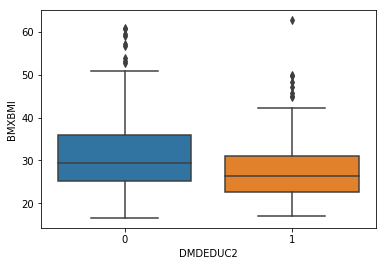

In [26]:
sns.boxplot(x = q4_df['DMDEDUC2'], y = q4_df['BMXBMI']);

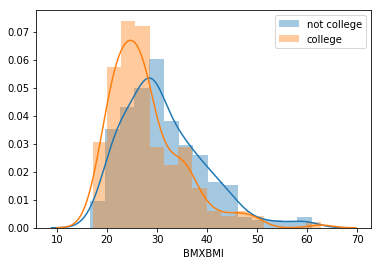

In [27]:
sns.distplot(q4_df[q4_df['DMDEDUC2']==0]['BMXBMI'], label = "not college")
sns.distplot(q4_df[q4_df['DMDEDUC2']==1]['BMXBMI'], label = "college")
plt.legend(loc= 0);

In [60]:
q4_df.groupby("DMDEDUC2")['BMXBMI'].agg(['std','mean','size'])

,std,mean,size
DMDEDUC2,,,
0,8.256083,31.257345,354
1,7.358264,27.808187,171


In [62]:
# pooled se
pstd = np.std(q4_df['BMXBMI'])
pstd*np.sqrt(1/354+1/171)

0.7564407915676038

In [63]:
# unpooled se
np.sqrt(8.256083**2/354+7.358264**2/171)

0.7135702133542994

###### pooled

In [53]:
test1 = sm.stats.DescrStatsW(q4_df[q4_df['DMDEDUC2']==0]['BMXBMI'])
test2 = sm.stats.DescrStatsW(q4_df[q4_df['DMDEDUC2']==1]['BMXBMI'])

###### unpooled

In [55]:
print(sm.stats.CompareMeans(test1,test2).ztest_ind())
sm.stats.CompareMeans(test1,test2).ztest_ind(usevar = 'unequal')

(4.643908450956424, 3.4187910067116893e-06)


(4.833662355599101, 1.340438616920389e-06)

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

strong evidence suggests to reject H0

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

negligible

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [65]:
# insert your code here
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [66]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [72]:
q5_df = da[['BPXDI1','BPXDI2']].dropna()

In [76]:
np.mean(q5_df['BPXDI1']-q5_df['BPXDI2'])

0.3490407897187558

###### pair test

In [73]:
sm.stats.ztest(q5_df['BPXDI1']-q5_df['BPXDI2'])

(4.140387087476751, 3.467202439743513e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

assuming the first and second diastolic blood pressure measurements within a subject have the same mean values, in our random selected sample the probability of getting the test result of having a difference is very small, indicates that we have strong evidence to rejuect the first and second diastolic blood pressure measurements within a subject have the same mean values.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [77]:
sm.stats.ztest(q5_df['BPXDI1'], q5_df['BPXDI2'])

(1.405785955157218, 0.15978769381769953)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

within a the subject means one sample. We then use the mean of all the difference between `BPXDI1` and `BPXDI2` to compare the H0: `BPXDI1` - `BPXDI2` = 0. Using this p value to evaluate the H0 afterward.

When comparing the two means of columns `BPXDI1` and `BPXDI2`, however, we are treating them as two independent samples. It is then become a two samples mean test, instead of one person taking measurement twice, it suggests two independent groups of people taking the same test then we test if the difference of two results are statistically significant.